# Applying for the test

Consider a student who passed the SHSAT exam. First, he needed to pass through three steps:

- Applying for the test
- Taking the test
- Performing good at the test (better than the other students)

In this notebook, we will explore the first step. This is the step that PASSNYC seems to be most interested in. Also,
it is directly measurable (as in the District 5 dataset), but not its causes.

Question:

- What is needed for a student to apply for the test?

## Hypothesis

Let's consider that, for a student apply to a test, three elements must be present (all of them are necessary):

1. The student must know about the test
2. The student must determine the test is good for him
3. The student must have access to the way of applying to the test (the difficulty in this may interfere with element #2)

In [1]:
# first, we will see what can we get directly from the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('../data/raw/D5 SHSAT Registrations and Testers.csv')
df.head()

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
0,05M046,P.S. 046 Arthur Tappan,2013,8,91,31,14
1,05M046,P.S. 046 Arthur Tappan,2014,8,95,26,7
2,05M046,P.S. 046 Arthur Tappan,2015,8,73,21,10
3,05M046,P.S. 046 Arthur Tappan,2016,8,56,20,8
4,05M123,P.S. 123 Mahalia Jackson,2013,8,62,31,14


In [3]:
df8 = df[df['Grade level'] == 8]
df9 = df[df['Grade level'] == 9]

## Enrollment vs. Students registered

In [4]:
def pct(f):
    return "{:.2f}".format(f) + "%"

enrolled = df8['Enrollment on 10/31'].sum()
registered = df8['Number of students who registered for the SHSAT'].sum()

print("8th grade\n")
print("students who registered:", registered)
print("students enrolled:", enrolled)
print("percentage:", pct(100 * registered / enrolled))

8th grade

students who registered: 2534
students enrolled: 6671
percentage: 37.99%


In [5]:
enrolled = df9['Enrollment on 10/31'].sum()
registered = df9['Number of students who registered for the SHSAT'].sum()

print("9th grade\n")
print("students who registered:", registered)
print("students enrolled:", enrolled)
print("percentage:", pct(100 * registered / enrolled))

9th grade

students who registered: 136
students enrolled: 6205
percentage: 2.19%


Nobody from the 9th grade registers for the test. We are gonna keep this as an observation and ignore this data from now on.

In [6]:
df = df8

### enrollment vs. student registered for each school (2016)

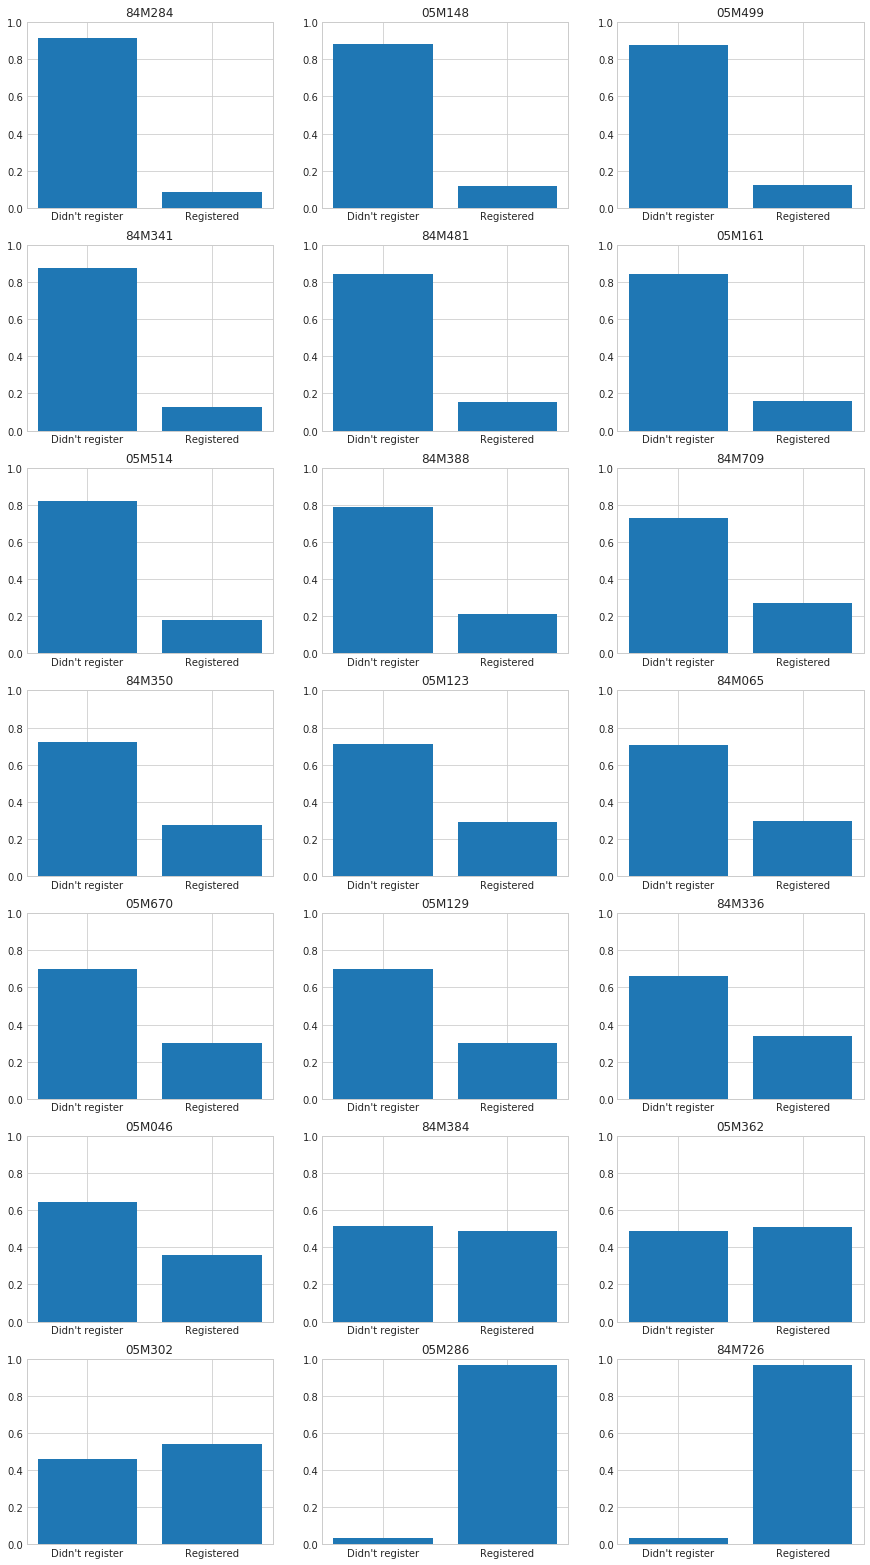

In [7]:
d = df[df['Year of SHST'] == 2016].copy()
d['register'] = d['Number of students who registered for the SHSAT'] / d['Enrollment on 10/31'] 
d['didnt_register'] = (d['Enrollment on 10/31'] - d['Number of students who registered for the SHSAT']) / d['Enrollment on 10/31'] 
d = d.sort_values('register')

fig, axes = plt.subplots(7, 3, figsize=(15, 28))

for i, (_, row) in enumerate(d.iterrows()):
    ax = axes[i // 3, i % 3]
    row = d.iloc[i]
    ax.set_title(row['DBN'])
    ax.bar([0,1], [row.didnt_register, row.register], tick_label=['Didn\'t register', 'Registered'])
    ax.set_ylim(bottom=0, top=1)

Most schools have few registers.

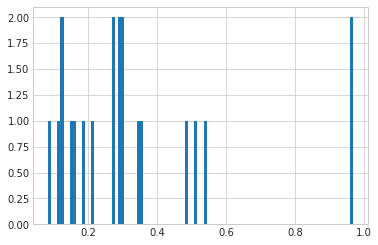

In [8]:
plt.hist(d['register'], bins=100);

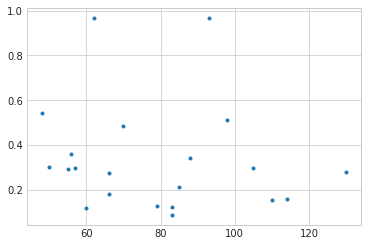

In [9]:
plt.plot(d['Enrollment on 10/31'], d['register'], '.')

The percentage doesn't seem related to the amount of students.

And it is fairly wide.

### enrollment vs. student registered for each school (time series)

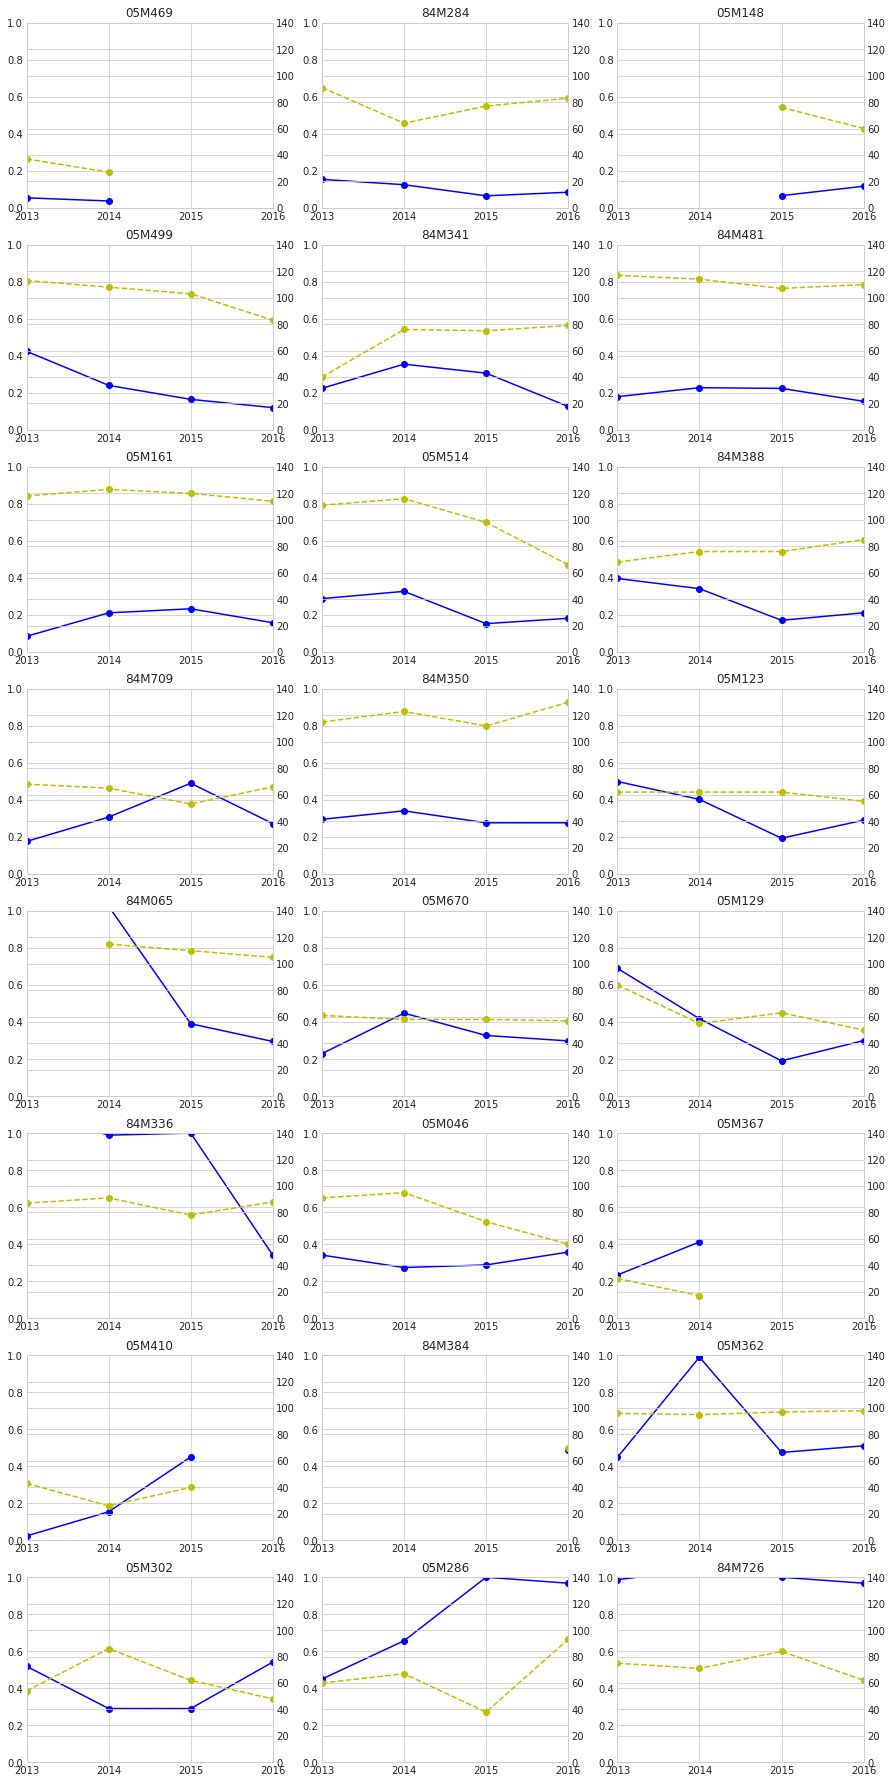

In [10]:
d = df.copy()
d['register'] = d['Number of students who registered for the SHSAT'] /  d['Enrollment on 10/31']
d['didnt_register'] = 1 - d['register']

last_register = d.groupby('DBN').apply(lambda df: df.sort_values('Year of SHST').iloc[-1].register).to_dict()                           
schools = sorted(d.groupby('DBN'), key=lambda x: last_register[x[0]])

fig, axes = plt.subplots(8, 3, figsize=(15,  32))

for i, (code, d) in enumerate(schools):
    ax = axes[i // 3, i % 3]
    ax.set_title(code)
    ax.plot(d['Year of SHST'], d['register'], 'bo-')
#     ax.plot(d['Year of SHST'], d['didnt_register'], 'ro-')
    ax.set_xlim(2013, 2016)
    ax.set_ylim(0, 1)
    ax.set_xticks(range(2013, 2017))
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    
    ax2 = ax.twinx()
    ax2.set_ylim(0, 140)
    ax2.plot(d['Year of SHST'], d['Enrollment on 10/31'], 'y--o')

Most schools seem fairly contant in the percentage of registrants. However, there are some with sudden jumps between the years. Why is it that some classes  (in the same school) have so much more applicants and some so fewer?

*Note*: The percentage of registered students may go above 100%, as the enrollment is calculated on a specific date, different then the date when the registration occur (when is it?).

In [11]:
df.loc[137].to_frame()  # example

,137
DBN,84M726
School name,KIPP STAR College Prep Charter School
Year of SHST,2014
Grade level,8
Enrollment on 10/31,71
Number of students who registered for the SHSAT,74
Number of students who took the SHSAT,19


In [12]:
df[df.DBN == '05M286']  # school changed its name (but not its code)

,DBN,School name,Year of SHST,Grade level,Enrollment on 10/31,Number of students who registered for the SHSAT,Number of students who took the SHSAT
23,05M286,I.S. M286 Renaissance Leadership Academy,2013,8,60,27,13
24,05M286,I.S. M286 Renaissance Leadership Academy,2014,8,67,44,9
25,05M286,I.S. M286 Renaissance Leadership Academy,2015,8,38,38,6
26,05M286,Urban Assembly Academy for Future Leaders,2016,8,93,90,25


---

## Joining the two datasets

Here we will try to obtain application information based on the school information.

As our application information is a time series (from 2013 to 2016), we will summarize it by taking the mean.

Another idea is just using the value of 2016.

(later we also want to apply a linear regression to find the coefficient, and, maybe, find a pattern on whether more people are applying for the SHSAT.

In [13]:
schools = pd.read_csv('../data/raw/2016 School Explorer.csv')
df.DBN.isin(schools['Location Code']).sum()

78

In [14]:
# we lost 4 entries after performing the cleaning
# that is acceptable

schools = pd.read_pickle('../data/pre/schools2016.pkl')
df.DBN.isin(schools['Location Code']).sum()

74

In [15]:
d1 = schools.set_index('Location Code')
d1 = d1.drop(['School Name', 'SED Code', 'Address (Full)', 'Zip', 'Grades', 'City'], axis=1)
d1['Community School?'] = d1['Community School?'].astype(int)

d2 = df.set_index('DBN')
d2 = d2[d2['Year of SHST'] == 2016]
d2 = d2[['Enrollment on 10/31', 'Number of students who registered for the SHSAT']]
d2['Percentage of Students who registered for the SHSAT'] = d2['Number of students who registered for the SHSAT'] / d2['Enrollment on 10/31']

print("Schools before joining:", d2.index.unique().size)
print("School after joining:", d1.join(d2, how='inner').index.unique().size)

df = d1.join(d2, how='inner')

Schools before joining: 21
School after joining: 20


### Predicting the number of applicants

Let's see if we can predict the number of applicants using some machine learning.

In [16]:
df.head()

,District,Latitude,Longitude,Grade Low,Grade High,Community School?,Economic Need Index,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,...,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - Hispanic or Latino,Grade 7 ELA 4s - Asian or Pacific Islander,Grade 7 ELA 4s - White,Grade 7 ELA 4s - Multiracial,Grade 7 ELA 4s - Limited English Proficient,Grade 7 ELA 4s - Economically Disadvantaged,Grade 7 Math - All Students Tested,Grade 7 Math 4s - All Students,Grade 7 Math 4s - American Indian or Alaska Native,Grade 7 Math 4s - Black or African American,Grade 7 Math 4s - Hispanic or Latino,Grade 7 Math 4s - Asian or Pacific Islander,Grade 7 Math 4s - White,Grade 7 Math 4s - Multiracial,Grade 7 Math 4s - Limited English Proficient,Grade 7 Math 4s - Economically Disadvantaged,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,School Income Estimate,Enrollment on 10/31,Number of students who registered for the SHSAT,Percentage of Students who registered for the SHSAT
05M046,5,40.831496,-73.936154,-1,6,0,0.903,9.0,1.0,50.0,48.0,97.0,1.0,90.0,39.0,91.0,3,89.0,3,85.0,3,81.0,3,80.0,2,90.0,3,2,2.19,2.19,78,2,0,1,0,0,0,0,0,2,79,3,0,1,0,0,0,0,0,3,...,0,0,0,0,0,0,58,3,0,0,3,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,63,3,0,0,0,0,0,0,0,3,63,1,0,0,0,0,0,0,0,1,23035.78,56,20,0.357143
05M123,5,40.820192,-73.944457,-1,8,1,0.835,17.0,2.0,52.0,41.0,93.0,4.0,88.0,49.0,83.0,2,72.0,2,84.0,2,65.0,1,82.0,2,81.0,2,2,2.11,2.00,41,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,55,0,0,0,0,0,0,0,0,0,56,1,0,1,0,0,0,0,0,1,60,0,0,0,0,0,0,0,0,0,34752.53,55,16,0.290909
05M129,5,40.814981,-73.952121,-1,8,0,0.854,11.0,2.0,42.0,51.0,93.0,1.0,92.0,33.0,90.0,2,91.0,2,82.0,2,76

0.09336071087857178
Grade 8 ELA - All Students Tested    -0.000595
Grade 8 Math - All Students Tested   -0.000910
dtype: float64
-0.6238774596364949


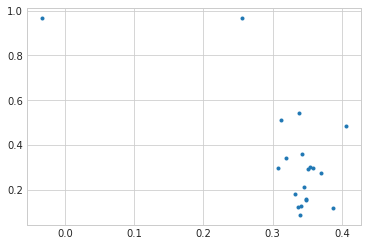

In [17]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.model_selection import cross_val_predict, LeaveOneOut

columns = [
 'District',
 'Latitude',
 'Longitude',
 'Grade Low',
 'Grade High',
 'Community School?',
 'Economic Need Index',
 'Percent ELL',
 'Percent Asian',
 'Percent Black',
 'Percent Hispanic',
 'Percent Black / Hispanic',
 'Percent White',
 'Student Attendance Rate',
 'Percent of Students Chronically Absent',
 'Rigorous Instruction %',
 'Rigorous Instruction Rating',
 'Collaborative Teachers %',
 'Collaborative Teachers Rating',
 'Supportive Environment %',
 'Supportive Environment Rating',
 'Effective School Leadership %',
 'Effective School Leadership Rating',
 'Strong Family-Community Ties %',
 'Strong Family-Community Ties Rating',
 'Trust %',
 'Trust Rating',
 'Student Achievement Rating',
 'Average ELA Proficiency',
 'Average Math Proficiency',
#  'Grade 3 ELA - All Students Tested',
#  'Grade 3 ELA 4s - All Students',
#  'Grade 3 ELA 4s - American Indian or Alaska Native',
#  'Grade 3 ELA 4s - Black or African American',
#  'Grade 3 ELA 4s - Hispanic or Latino',
#  'Grade 3 ELA 4s - Asian or Pacific Islander',
#  'Grade 3 ELA 4s - White',
#  'Grade 3 ELA 4s - Multiracial',
#  'Grade 3 ELA 4s - Limited English Proficient',
#  'Grade 3 ELA 4s - Economically Disadvantaged',
#  'Grade 3 Math - All Students tested',
#  'Grade 3 Math 4s - All Students',
#  'Grade 3 Math 4s - American Indian or Alaska Native',
#  'Grade 3 Math 4s - Black or African American',
#  'Grade 3 Math 4s - Hispanic or Latino',
#  'Grade 3 Math 4s - Asian or Pacific Islander',
#  'Grade 3 Math 4s - White',
#  'Grade 3 Math 4s - Multiracial',
#  'Grade 3 Math 4s - Limited English Proficient',
#  'Grade 3 Math 4s - Economically Disadvantaged',
#  'Grade 4 ELA - All Students Tested',
#  'Grade 4 ELA 4s - All Students',
#  'Grade 4 ELA 4s - American Indian or Alaska Native',
#  'Grade 4 ELA 4s - Black or African American',
#  'Grade 4 ELA 4s - Hispanic or Latino',
#  'Grade 4 ELA 4s - Asian or Pacific Islander',
#  'Grade 4 ELA 4s - White',
#  'Grade 4 ELA 4s - Multiracial',
#  'Grade 4 ELA 4s - Limited English Proficient',
#  'Grade 4 ELA 4s - Economically Disadvantaged',
#  'Grade 4 Math - All Students Tested',
#  'Grade 4 Math 4s - All Students',
#  'Grade 4 Math 4s - American Indian or Alaska Native',
#  'Grade 4 Math 4s - Black or African American',
#  'Grade 4 Math 4s - Hispanic or Latino',
#  'Grade 4 Math 4s - Asian or Pacific Islander',
#  'Grade 4 Math 4s - White',
#  'Grade 4 Math 4s - Multiracial',
#  'Grade 4 Math 4s - Limited English Proficient',
#  'Grade 4 Math 4s - Economically Disadvantaged',
#  'Grade 5 ELA - All Students Tested',
#  'Grade 5 ELA 4s - All Students',
#  'Grade 5 ELA 4s - American Indian or Alaska Native',
#  'Grade 5 ELA 4s - Black or African American',
#  'Grade 5 ELA 4s - Hispanic or Latino',
#  'Grade 5 ELA 4s - Asian or Pacific Islander',
#  'Grade 5 ELA 4s - White',
#  'Grade 5 ELA 4s - Multiracial',
#  'Grade 5 ELA 4s - Limited English Proficient',
#  'Grade 5 ELA 4s - Economically Disadvantaged',
#  'Grade 5 Math - All Students Tested',
#  'Grade 5 Math 4s - All Students',
#  'Grade 5 Math 4s - American Indian or Alaska Native',
#  'Grade 5 Math 4s - Black or African American',
#  'Grade 5 Math 4s - Hispanic or Latino',
#  'Grade 5 Math 4s - Asian or Pacific Islander',
#  'Grade 5 Math 4s - White',
#  'Grade 5 Math 4s - Multiracial',
#  'Grade 5 Math 4s - Limited English Proficient',
#  'Grade 5 Math 4s - Economically Disadvantaged',
#  'Grade 6 ELA - All Students Tested',
#  'Grade 6 ELA 4s - All Students',
#  'Grade 6 ELA 4s - American Indian or Alaska Native',
#  'Grade 6 ELA 4s - Black or African American',
#  'Grade 6 ELA 4s - Hispanic or Latino',
#  'Grade 6 ELA 4s - Asian or Pacific Islander',
#  'Grade 6 ELA 4s - White',
#  'Grade 6 ELA 4s - Multiracial',
#  'Grade 6 ELA 4s - Limited English Proficient',
#  'Grade 6 ELA 4s - Economically Disadvantaged',
#  'Grade 6 Math - All Students Tested',
#  'Grade 6 Math 4s - All Students',
#  'Grade 6 Math 4s - American Indian or Alaska Native',
#  'Grade 6 Math 4s - Black or African American',
#  'Grade 6 Math 4s - Hispanic or Latino',
#  'Grade 6 Math 4s - Asian or Pacific Islander',
#  'Grade 6 Math 4s - White',
#  'Grade 6 Math 4s - Multiracial',
#  'Grade 6 Math 4s - Limited English Proficient',
#  'Grade 6 Math 4s - Economically Disadvantaged',
#  'Grade 7 ELA - All Students Tested',
#  'Grade 7 ELA 4s - All Students',
#  'Grade 7 ELA 4s - American Indian or Alaska Native',
#  'Grade 7 ELA 4s - Black or African American',
#  'Grade 7 ELA 4s - Hispanic or Latino',
#  'Grade 7 ELA 4s - Asian or Pacific Islander',
#  'Grade 7 ELA 4s - White',
#  'Grade 7 ELA 4s - Multiracial',
#  'Grade 7 ELA 4s - Limited English Proficient',
#  'Grade 7 ELA 4s - Economically Disadvantaged',
#  'Grade 7 Math - All Students Tested',
#  'Grade 7 Math 4s - All Students',
#  'Grade 7 Math 4s - American Indian or Alaska Native',
#  'Grade 7 Math 4s - Black or African American',
#  'Grade 7 Math 4s - Hispanic or Latino',
#  'Grade 7 Math 4s - Asian or Pacific Islander',
#  'Grade 7 Math 4s - White',
#  'Grade 7 Math 4s - Multiracial',
#  'Grade 7 Math 4s - Limited English Proficient',
#  'Grade 7 Math 4s - Economically Disadvantaged',
 'Grade 8 ELA - All Students Tested',
 'Grade 8 ELA 4s - All Students',
 'Grade 8 ELA 4s - American Indian or Alaska Native',
 'Grade 8 ELA 4s - Black or African American',
 'Grade 8 ELA 4s - Hispanic or Latino',
 'Grade 8 ELA 4s - Asian or Pacific Islander',
 'Grade 8 ELA 4s - White',
 'Grade 8 ELA 4s - Multiracial',
 'Grade 8 ELA 4s - Limited English Proficient',
 'Grade 8 ELA 4s - Economically Disadvantaged',
 'Grade 8 Math - All Students Tested',
 'Grade 8 Math 4s - All Students',
 'Grade 8 Math 4s - American Indian or Alaska Native',
 'Grade 8 Math 4s - Black or African American',
 'Grade 8 Math 4s - Hispanic or Latino',
 'Grade 8 Math 4s - Asian or Pacific Islander',
 'Grade 8 Math 4s - White',
 'Grade 8 Math 4s - Multiracial',
 'Grade 8 Math 4s - Limited English Proficient',
 'Grade 8 Math 4s - Economically Disadvantaged',
#  'School Income Estimate',
 'Enrollment on 10/31',
#  'Number of students who registered for the SHSAT',
 'Percentage of Students who registered for the SHSAT'
]

d = df.copy()
d = d[columns]

# didn't work
# d['Percentage ELA'] = d['Grade 8 ELA - All Students Tested'] / d['Enrollment on 10/31']
# d['Percentage Math'] = d['Grade 8 Math - All Students Tested'] / d['Enrollment on 10/31']
# d = d.drop('Grade 8 ELA - All Students Tested', axis=1)
# d = d.drop('Grade 8 Math - All Students Tested', axis=1)

labels = d['Percentage of Students who registered for the SHSAT']
d = d.drop(['Percentage of Students who registered for the SHSAT'], axis=1)

model = LassoCV(n_jobs=-1, max_iter=100000)
model.fit(d, labels)
print(model.score(d, labels))

s = pd.Series(model.coef_, index=d.columns).sort_values()[::-1]
print(s[s != 0])

predictions = cross_val_predict(model, d, labels, cv=LeaveOneOut())
plt.plot(predictions, labels, '.')

score = r2_score(labels, predictions)
print(score)

Although the results are inverted, the significance of these two columns gave me an insight... If more students participate on the state test, then, probably, more students will take the SHSAT as well.

-0.266291891559147


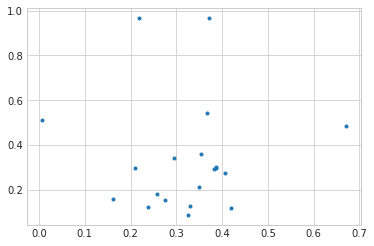

In [18]:
columns = [
 'Grade 8 ELA - All Students Tested',
 'Grade 8 Math - All Students Tested',
 'Percentage of Students who registered for the SHSAT'
]

d = df.copy()
d = d[columns]

# pop label
labels = d['Percentage of Students who registered for the SHSAT']
d = d.drop(['Percentage of Students who registered for the SHSAT'], axis=1)

predictions = cross_val_predict(LinearRegression(), d, labels, cv=LeaveOneOut())
plt.plot(predictions, labels, '.')

score = r2_score(labels, predictions)
print(score)

### Removing the outliers

There are some schools that are clearly outliers when it comes to SHSAT registration.

Do we get better results if we remove them?

In [19]:
schools = pd.read_pickle('../data/pre/schools2016.pkl')

d1 = schools.set_index('Location Code')
d1 = d1.drop(['School Name', 'SED Code', 'Address (Full)', 'Zip', 'Grades', 'City'], axis=1)
d1['Community School?'] = d1['Community School?'].astype(int)

d2 = df8.set_index('DBN')
d2 = d2[d2['Year of SHST'] == 2016]
d2 = d2[['Enrollment on 10/31', 'Number of students who registered for the SHSAT']]
d2['Percentage of Students who registered for the SHSAT'] = d2['Number of students who registered for the SHSAT'] / d2['Enrollment on 10/31']

print("Schools before joining:", d2.index.unique().size)
print("School after joining:", d1.join(d2, how='inner').index.unique().size)

df = d1.join(d2, how='inner')

Schools before joining: 21
School after joining: 20


In [20]:
from IPython.display import display

col = df['Percentage of Students who registered for the SHSAT']

mean = col.mean()
sd = col.std()

print("Entries to remove:")
display(df[np.abs(col - mean) > 2 * sd])

df = df[np.abs(col - mean) <= 2 * sd]

Entries to remove:


,District,Latitude,Longitude,Grade Low,Grade High,Community School?,Economic Need Index,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,...,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - Hispanic or Latino,Grade 7 ELA 4s - Asian or Pacific Islander,Grade 7 ELA 4s - White,Grade 7 ELA 4s - Multiracial,Grade 7 ELA 4s - Limited English Proficient,Grade 7 ELA 4s - Economically Disadvantaged,Grade 7 Math - All Students Tested,Grade 7 Math 4s - All Students,Grade 7 Math 4s - American Indian or Alaska Native,Grade 7 Math 4s - Black or African American,Grade 7 Math 4s - Hispanic or Latino,Grade 7 Math 4s - Asian or Pacific Islander,Grade 7 Math 4s - White,Grade 7 Math 4s - Multiracial,Grade 7 Math 4s - Limited English Proficient,Grade 7 Math 4s - Economically Disadvantaged,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,School Income Estimate,Enrollment on 10/31,Number of students who registered for the SHSAT,Percentage of Students who registered for the SHSAT
05M286,5,40.815745,-73.955600,6,8,0,0.817,6.0,0.0,59.0,39.0,98.0,1.0,87.0,42.0,92.0,3,86.0,3,90.0,3,76.0,2,78.0,2,86.0,2,1,2.12,1.92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,0,0,36,0,0,0,0,0,0,0,0,0,NaN,93,90,0.967742
84M726,5,40.810854,-73.956339,0,12,0,0.746,4.0,1.0,56.0,41.0,97.0,1.0,95.0,14.0,87.0,3,90.0,3,80.0,3,90.0,3,88.0,3,92.0,3,4,2.54,2.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,38,67,8,0,3,0,0,0,0,0,8,66,15,0,8,0,0,0,0,0,14,84,11,0,0,7,0,0,0,0,10,84,23,0,0,15,0,0,0,0,18,NaN,62,60,0.967742


In-train score: 0.6408336197455156
CV score: 0.39805727676030545

Grade 8 ELA - All Students Tested    -0.001788
Grade 8 Math - All Students Tested   -0.001961
Percent Black                        -0.003420
dtype: float64


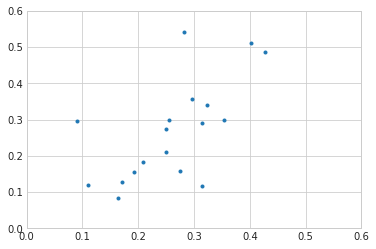

In [21]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV
from sklearn.model_selection import cross_val_predict, LeaveOneOut

columns = [
 'Percent Black',
 'Grade 8 ELA - All Students Tested',
 'Grade 8 Math - All Students Tested',
 'Percentage of Students who registered for the SHSAT'
]

# prepare
d = df.copy()[columns]

labels = d['Percentage of Students who registered for the SHSAT']
d = d.drop(['Percentage of Students who registered for the SHSAT'], axis=1)

# train
model = LassoCV(n_jobs=-1, max_iter=100000)
model.fit(d, labels)
predictions = cross_val_predict(model, d, labels, cv=LeaveOneOut())

print("In-train score:", model.score(d, labels))
print("CV score:",  r2_score(labels, predictions))

print()
s = pd.Series(model.coef_, index=d.columns).sort_values()[::-1]
s = s[s != 0]
print(s)


plt.plot(predictions, labels, '.')
plt.xlim(0, 0.6)
plt.ylim(0, 0.6);

While this is working, it is probably overfitted and, we can't generalize it to the whole city just yet. At last, the coefficients didn't have the expected sign (we expected that if a school tested a lot of students, lots of students will also register for the SHSAT, but, the relationship found is reverse). The wrong signs might be due to correlation with another features.

As an experiment, it went well. More robust Cross-Validation methods are needed to test the hypothesis for real.

In-train score: 0.3627736841685786
CV score: -2.636594511944971

Percent Black                        -0.075884
Grade 8 Math - All Students Tested   -0.105717
dtype: float64


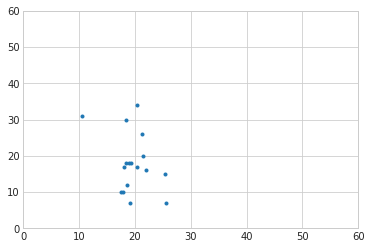

In [22]:
# let's try the direct measure

from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV
from sklearn.model_selection import cross_val_predict, cross_val_score, LeaveOneOut

columns = [
 'Percent Asian',
 'Percent Black',
 'Percent Hispanic',
 'Percent Black / Hispanic',
 'Percent White',
 'Grade 8 ELA - All Students Tested',
 'Grade 8 Math - All Students Tested',
 'Number of students who registered for the SHSAT',
]

# prepare
d = df.copy()[columns]
labels = d.pop('Number of students who registered for the SHSAT')

# train
model = LassoCV(n_jobs=-1, max_iter=100000)
model.fit(d, labels)
predictions = cross_val_predict(model, d, labels, cv=LeaveOneOut())

print("In-train score:", model.score(d, labels))
print("CV score:",  r2_score(labels, predictions))

print()
s = pd.Series(model.coef_, index=d.columns).sort_values()[::-1]
print(s[s != 0])

plt.plot(predictions, labels, '.')
plt.xlim(0, 60)
plt.ylim(0, 60);

Last one didn't quite work! We could predict the percentages but not the raw values... Strange! Haha

Anyway

### Joining by the mean

Given that data from only one year may be pretty variant, can we perform better predictions over the mean over the years?

In [23]:
schools = pd.read_pickle('../data/pre/schools2016.pkl')

d1 = schools.set_index('Location Code')
d1 = d1.drop(['School Name', 'SED Code', 'Address (Full)', 'Zip', 'Grades', 'City'], axis=1)
d1['Community School?'] = d1['Community School?'].astype(int)

d2 = df8.groupby('DBN').mean()[['Enrollment on 10/31', 'Number of students who registered for the SHSAT']]
d2.columns = ['Mean enrollment', 'Mean applications']
d2['Percentage'] = d2['Mean applications'] / d2['Mean enrollment']

print("Schools before joining:", d2.index.unique().size)
print("School after joining:", d1.join(d2, how='inner').index.unique().size)

df = d1.join(d2, how='inner')
df.head()

Schools before joining: 24
School after joining: 20


,District,Latitude,Longitude,Grade Low,Grade High,Community School?,Economic Need Index,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,...,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - Hispanic or Latino,Grade 7 ELA 4s - Asian or Pacific Islander,Grade 7 ELA 4s - White,Grade 7 ELA 4s - Multiracial,Grade 7 ELA 4s - Limited English Proficient,Grade 7 ELA 4s - Economically Disadvantaged,Grade 7 Math - All Students Tested,Grade 7 Math 4s - All Students,Grade 7 Math 4s - American Indian or Alaska Native,Grade 7 Math 4s - Black or African American,Grade 7 Math 4s - Hispanic or Latino,Grade 7 Math 4s - Asian or Pacific Islander,Grade 7 Math 4s - White,Grade 7 Math 4s - Multiracial,Grade 7 Math 4s - Limited English Proficient,Grade 7 Math 4s - Economically Disadvantaged,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,School Income Estimate,Mean enrollment,Mean applications,Percentage
05M046,5,40.831496,-73.936154,-1,6,0,0.903,9.0,1.0,50.0,48.0,97.0,1.0,90.0,39.0,91.0,3,89.0,3,85.0,3,81.0,3,80.0,2,90.0,3,2,2.19,2.19,78,2,0,1,0,0,0,0,0,2,79,3,0,1,0,0,0,0,0,3,...,0,0,0,0,0,0,58,3,0,0,3,0,0,0,0,0,58,0,0,0,0,0,0,0,0,0,63,3,0,0,0,0,0,0,0,3,63,1,0,0,0,0,0,0,0,1,23035.78,78.75,24.5,0.311111
05M123,5,40.820192,-73.944457,-1,8,1,0.835,17.0,2.0,52.0,41.0,93.0,4.0,88.0,49.0,83.0,2,72.0,2,84.0,2,65.0,1,82.0,2,81.0,2,2,2.11,2.00,41,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,55,0,0,0,0,0,0,0,0,0,56,1,0,1,0,0,0,0,0,1,60,0,0,0,0,0,0,0,0,0,34752.53,60.25,21.0,0.348548
05M129,5,40.814981,-73.952121,-1,8,0,0.854,11.0,2.0,42.0,51.0,93.0,1.0,92.0,33.0,90.0,2,91.0,2,82.0,2,76.0,2,81.0,2,89.0,3,3,2.38,2.29,38,5,0,2,2,0,0,0,0,0,39,7,0,2,3,0,

In [24]:
from IPython.display import display

col = df['Percentage']

mean = col.mean()
sd = col.std()

print("Entries to remove:")
display(df[np.abs(col - mean) > 1.5 * sd])

df = df[np.abs(col - mean) <= 1.5 * sd]

Entries to remove:


,District,Latitude,Longitude,Grade Low,Grade High,Community School?,Economic Need Index,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,...,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - Hispanic or Latino,Grade 7 ELA 4s - Asian or Pacific Islander,Grade 7 ELA 4s - White,Grade 7 ELA 4s - Multiracial,Grade 7 ELA 4s - Limited English Proficient,Grade 7 ELA 4s - Economically Disadvantaged,Grade 7 Math - All Students Tested,Grade 7 Math 4s - All Students,Grade 7 Math 4s - American Indian or Alaska Native,Grade 7 Math 4s - Black or African American,Grade 7 Math 4s - Hispanic or Latino,Grade 7 Math 4s - Asian or Pacific Islander,Grade 7 Math 4s - White,Grade 7 Math 4s - Multiracial,Grade 7 Math 4s - Limited English Proficient,Grade 7 Math 4s - Economically Disadvantaged,Grade 8 ELA - All Students Tested,Grade 8 ELA 4s - All Students,Grade 8 ELA 4s - American Indian or Alaska Native,Grade 8 ELA 4s - Black or African American,Grade 8 ELA 4s - Hispanic or Latino,Grade 8 ELA 4s - Asian or Pacific Islander,Grade 8 ELA 4s - White,Grade 8 ELA 4s - Multiracial,Grade 8 ELA 4s - Limited English Proficient,Grade 8 ELA 4s - Economically Disadvantaged,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged,School Income Estimate,Mean enrollment,Mean applications,Percentage
84M336,5,40.819764,-73.957240,0,12,0,0.798,12.0,0.0,30.0,68.0,98.0,1.0,96.0,12.0,93.0,4,95.0,4,88.0,4,94.0,4,90.0,4,95.0,4,4,2.60,3.13,97,7,0,2,4,0,0,0,1,6,97,49,0,17,31,0,0,0,3,44,...,38,0,0,0,2,40,90,18,0,0,11,0,0,0,0,0,89,48,0,0,39,0,0,0,0,0,78,10,0,0,7,0,0,0,0,0,78,45,0,0,38,0,0,0,0,0,33303.04,86.0,73.75,0.857558
84M726,5,40.810854,-73.956339,0,12,0,0.746,4.0,1.0,56.0,41.0,97.0,1.0,95.0,14.0,87.0,3,90.0,3,80.0,3,90.0,3,88.0,3,92.0,3,4,2.54,2.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,38,67,8,0,3,0,0,0,0,0,8,66,15,0,8,0,0,0,0,0,14,84,11,0,0,7,0,0,0,0,10,84,23,0,0,15,0,0,0,0,18,NaN,73.0,73.00,1.000000


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 4., 1., 0., 2., 1.,
        2., 2., 1.]),
 array([0.507 , 0.5268, 0.5466, 0.5664, 0.5862, 0.606 , 0.6258, 0.6456,
        0.6654, 0.6852, 0.705 , 0.7248, 0.7446, 0.7644, 0.7842, 0.804 ,
        0.8238, 0.8436, 0.8634, 0.8832, 0.903 ]),
 <a list of 20 Patch objects>)

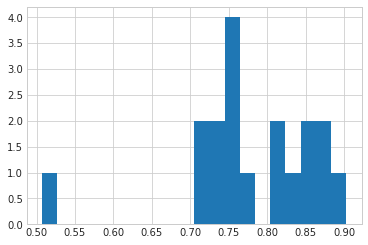

In [25]:
plt.hist(df['Economic Need Index'], bins=20)

In-train score: 0.06517078820789468
CV score: -0.2803315756609188


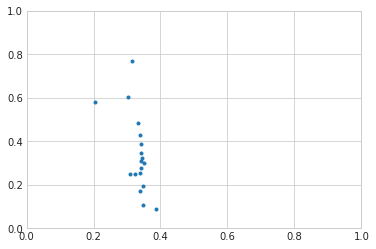

In [26]:
columns = [
 'Percent Asian',
 'Percent Black',
 'Percent Hispanic',
 'Percent Black / Hispanic',
 'Percent White',
 'Grade 8 ELA - All Students Tested',
 'Grade 8 Math - All Students Tested',
 'Percentage'
]


# prepare
d = df.copy()[columns]
labels = d.pop('Percentage')

# train
model = LassoCV(n_jobs=-1, max_iter=100000)
model.fit(d, labels)
predictions = cross_val_predict(model, d, labels, cv=LeaveOneOut())

print("In-train score:", model.score(d, labels))
print("CV score:",  r2_score(labels, predictions))

# print()
# s = pd.Series(model.coef_, index=d.columns).sort_values()[::-1]
# print(s[s != 0])

plt.plot(predictions, labels, '.')
plt.xlim(0, 1)
plt.ylim(0, 1);

We are not gathering any information from the features... Except for bit of overfitting

## Conclusion

From this we can conclude that most features are not useful when predicting the amount of applicants for the SHSAT.

Also, we can conclude that a reasonable prediction using schools information is hard. A better model might be created using past SHSAT amount of applicants.

Some features that seemed related to the amount of SHSAT applicants are:

- Grade 8 ELA - All Students Tested
- Grade 8 Math - All Students Tested
- Percent Asian
- Percent Black

The first and second features are the amount of 8th graders that took state tests this year. Interestingly enough, LASSO captured these features but didn't capture features from the 7th graders below. This leads me to believe that the relation might be real, and not just appeared out of sheer luck.

However, both features appeared as inversely correlated to the total amount of SHSAT registrants. Why is it so? Maybe they are correlated to another features... Maybe classes where lots of people take state tests do not have a great share of students who intend on taking SHSAT tests. Actually, this last affirmation is exactly what the data reveal us.

The race percentages appeared as we expected them... Black students apply less to the SHSAT and asian students apply more to the SHSAT.

##### Note

Again, our dataset is pretty small and contains information only about the District 5. Information retrieved here is pretty much subject to overfitting (as I used no validation) and to not represent the whole.